In [1]:
using PyPlot

In [2]:
using EMD
using Splines

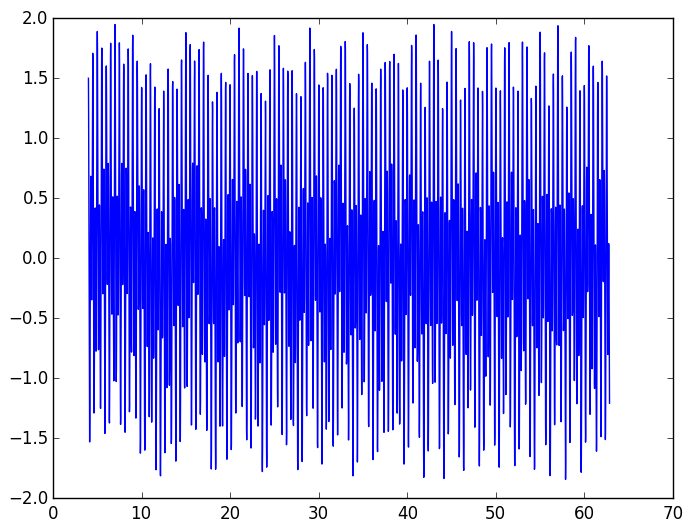

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ce339d0>

In [97]:
t = [linspace(4,20*pi,3000);]
# y = cos(2pi*t) + cos(8pi*t) + 0.25 * cos(pi*t)

y = cos(8*pi*t) + 0.75 * cos(4*pi*t + cos(0.5*pi*t)) + 0.2 * sin(0.01pi*t.^2)
plot(t,y)

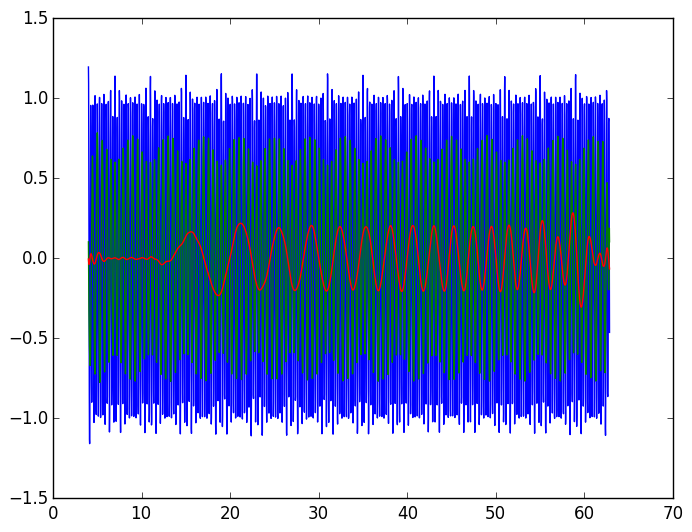

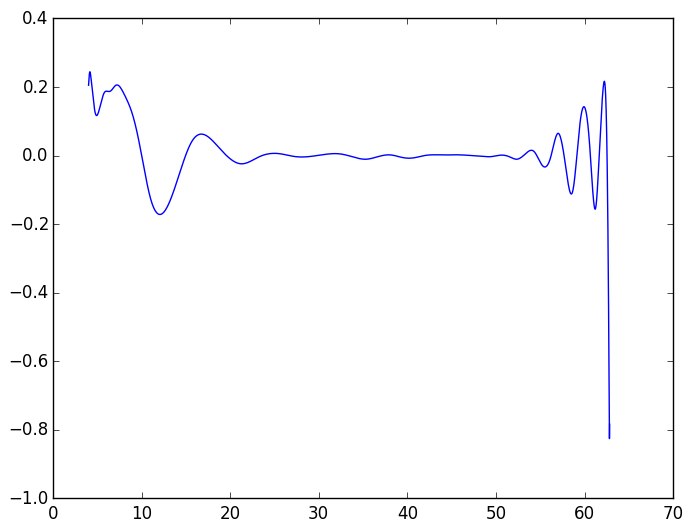

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d6caed0>

In [98]:
N = 3
order = 4
n = length(y)
toldev = 0.2
tolzero = 1e-2

f = IMF(y,t, toldev, tolzero, order, N)

temp = y
for i = 1:N
    plot(t,f[:,i])
    temp = temp - f[:,i]
end

#@show(f)

# maxarray, minarray, tmax, tmin = findExtrema(temp, t)
# p = min(order,length(maxarray)-2)
# p = Int(2*floor(p/2))
# @show(p)
# @show(maxarray)
# S1 = Spline(maxarray, tmax,p )
# p = min(order,length(minarray)-2)
# p = Int(2*floor(p/2))
# S2 = Spline(minarray, tmin, p)
figure()
plot(t,temp)
# axis([0,10,-1e-5,1e-5])
# # @show(temp)
# plot(t,S1(t),"red")
# plot(t,S2(t),"black")
# plot(tmax,max,"red")
# plot(tmin,min)
# @show(p)

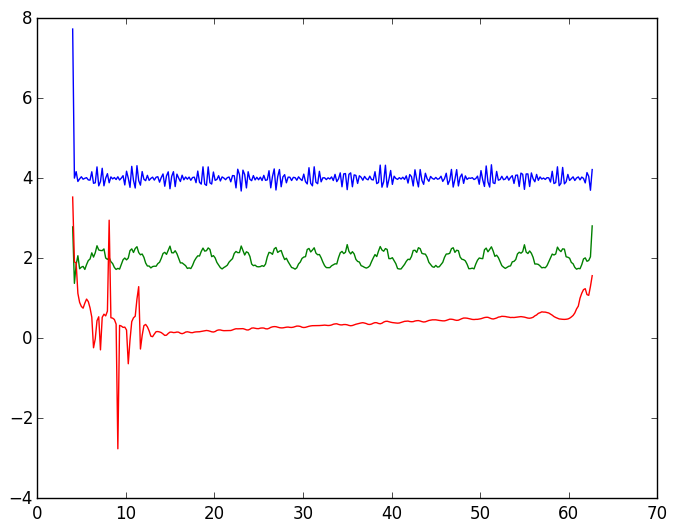

In [99]:
# calculate instantaneous frequency

x=t + 1e-8
x = x[1:10:end]
for i =1:N
    H1 = Spline(f[:,i], t, 4)
    A = SplineEvalMatrix(H1.B, x,0,true)
    phi = 1/(2pi)*(H1(x).*H1(x,1,true) - H1(x, 1).*H1(x,0,true))./(H1(x).^2 + H1(x,0,true).^2)
    plot(x,phi)
    #@show(H1(x))
    #@show(A[:,1:10])
end


In [14]:
maximum(abs(f[:,5]))

0.0